In [40]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns
%matplotlib inline

# Build dataframe with data for plotting

$\phi_{i} (x) = exp\left( \frac{-1}{2 \alpha} (x-m_i)^2 \right)$

In [116]:
def rbf(x, alpha, m):
    return np.exp(-1/(2*alpha)*(x-m)**2)

In [122]:
# Generate data with rbf
x = np.arange(-2, 5, 0.01)
df=pd.DataFrame(data=x, columns=['x']).set_index('x')
## make 5 radial functions, with different m 
for i in range(5):
    df[str(i)] = rbf(x,.25,i)
df.rename_axis('m', axis='columns', inplace = True)
df.head()

m,0,1,2,3,4
x,,,,,
-2.00,0.000335,1.522998e-08,1.266417e-14,1.928750e-22,5.380186e-32
-1.99,0.000363,1.716832e-08,1.485856e-14,2.355309e-22,6.838189e-32
-1.98,0.000393,1.934562e-08,1.742623e-14,2.875056e-22,8.687828e-32
-1.97,0.000426,2.179032e-08,2.042943e-14,3.508091e-22,1.103336e-31
-1.96,0.000460,2.453415e-08,2.394062e-14,4.278798e-22,1.400652e-31


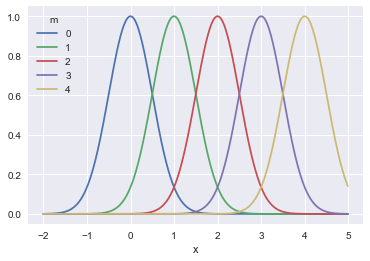

In [123]:
df.plot();

# Example: pattern learning with rbf and linear regression
Assuming $\alpha=1$, then 

$\phi_{i} (x) = exp\left( \frac{-1}{2} (x-m_i)^2 \right)$

## Generate monthly data

In [124]:
# Generate rbf
x = np.arange(0, 12, 0.01)
df=pd.DataFrame(data=x, columns=['x'])
df['y'] = np.sin(x) + 2*np.cos(x/2) + np.random.normal(loc=0.0, scale=.2, size=len(df))
df.head()

,x,y
0,0.00,2.142937
1,0.01,2.171556
2,0.02,2.149248
3,0.03,1.886804
4,0.04,1.839648


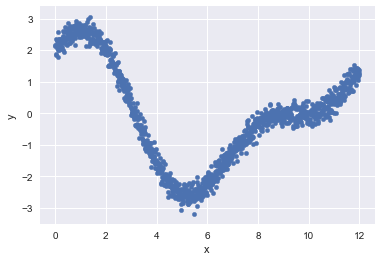

In [125]:
df.plot(kind='scatter', x='x', y='y');

## With $\alpha =1$ add a radial function for each month 

In [126]:
for i in range(1,13):
    df[str(i)] = rbf(df['x'],1,i)

In [127]:
df.head()

,x,y,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00,2.142937,0.606531,0.135335,0.011109,0.000335,0.000004,1.522998e-08,2.289735e-11,1.266417e-14,2.576757e-18,1.928750e-22,5.311092e-27,5.380186e-32
1,0.01,2.171556,0.612596,0.138062,0.011447,0.000349,0.000004,1.617094e-08,2.455637e-11,1.371824e-14,2.819280e-18,2.131492e-22,5.928359e-27,6.065840e-32
2,0.02,2.149248,0.618660,0.140830,0.011794,0.000363,0.000004,1.716832e-08,2.633295e-11,1.485856e-14,3.084321e-18,2.355309e-22,6.616705e-27,6.838189e-32
3,0.03,1.886804,0.624721,0.143639,0.012150,0.000378,0.000004,1.822539e-08,2.823525e-11,1.609207e-14,3.373942e-18,2.602369e-22,7.384236e-27,7.708110e-32
4,0.04,1.839648,0.630779,0.146490,0.012515,0.000393,0.000005,1.934562e-08,3.027194e-11,1.742623e-14,3.690388e-18,2.875056e-22,8.239977e-27,8.687828e-32


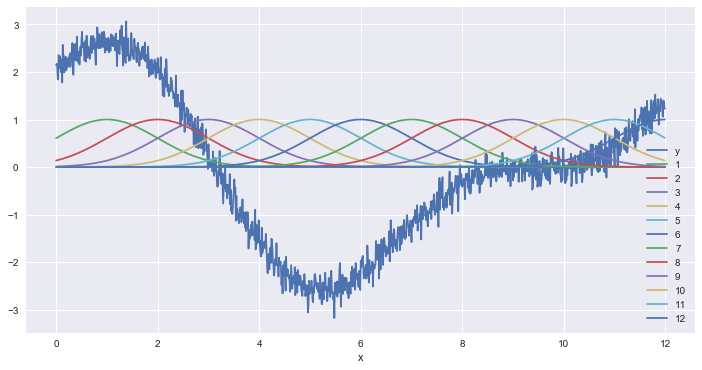

In [128]:
df.set_index('x').plot(figsize=(12,6));

# Forecasting bridge data with rbf linear regression 